<a href="https://colab.research.google.com/github/misaa9ns/DSS_misaa_ns_9/blob/main/Arbol_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Creación del diccionario de datos:

ID: Usuarios

Edad: Edad del usuario

IngresosAn: Ingresos anuales del usuario

HistorialCred: Historial crediticio del usuario, 1: buen historial crediticio, 0: mal historial crediticio

MontoPrestamo: Monto del préstamo solicitado por el usuario

Plazo: Plazo del préstamo solicitado en años

NumCredPrevios: Número de créditos pedidos anteriormente por el usuario

Empleo: Si el usuario es empleado o desempleado, 0: desempleado, 1: empleado, 2: autónomo

TasaInteres: Tasa de interés del préstamo

y: Variable de decisión que define si el préstamo es otorgado o no, 1: si, 0: no

#Curso Sistema de Informacion UACh
Integrantes:

- Benjamín Ruiz

- Misael Sandoval

- Héctor Ulloa

# **Árbol de decisión en Python**

In [1]:
# Importar las bibliotecas necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import pandas as pd
import seaborn as sns

# Cargar el conjunto de datos

URL='https://raw.githubusercontent.com/misaa9ns/DSS_misaa_ns_9/main/DSS.csv'
datos = pd.read_csv(URL, sep=';')
datos.head()


,ID,Edad,IngresosAn,HistorialCred,MontoPrestamo,Plazo,NumCredPrevios,Empleo,TasaInteres,y
0,1,46,40236050,1,8836720,12,9,2,"0,096",1
1,2,68,18056416,1,5173044,19,4,2,"0,041",1
2,3,32,17747806,1,15289792,28,7,1,"0,101",1
3,4,38,28381213,1,15866111,25,0,2,"0,098",1
4,5,38,49705930,1,9941039,6,10,2,"0,071",1


In [16]:
#Cambiar TasaInteres con coma
datos['TasaInteres'] = datos['TasaInteres'].astype(str).str.replace(',', '.').astype('float')
datos.head()

,ID,Edad,IngresosAn,HistorialCred,MontoPrestamo,Plazo,NumCredPrevios,Empleo,TasaInteres,y
0,1,46,40236050,1,8836720,12,9,2,0.096,1
1,2,68,18056416,1,5173044,19,4,2,0.041,1
2,3,32,17747806,1,15289792,28,7,1,0.101,1
3,4,38,28381213,1,15866111,25,0,2,0.098,1
4,5,38,49705930,1,9941039,6,10,2,0.071,1


In [9]:
#Resumen de estadisticas (media,mediana y desviacion estándar)
datos.describe()

,ID,Edad,IngresosAn,HistorialCred,MontoPrestamo,Plazo,NumCredPrevios,Empleo,TasaInteres,y
count,500.000000,500.000000,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,43.834000,3.037072e+07,0.774000,9.801463e+06,14.798000,4.984000,1.68600,0.092634,0.918000
std,144.481833,15.373064,1.684747e+07,0.418658,5.514868e+06,8.575095,3.213783,0.48567,0.035082,0.274639
min,1.000000,18.000000,3.020402e+06,0.000000,5.017830e+05,1.000000,0.000000,0.00000,0.030000,0.000000
25%,125.750000,31.000000,1.507775e+07,1.000000,5.102248e+06,7.000000,2.000000,1.00000,0.063000,1.000000
50%,250.500000,43.000000,2.983008e+07,1.000000,9.705172e+06,15.000000,5.000000,2.00000,0.094000,1.000000
75%,375.250000,58.000000,4.514055e+07,1.000000,1.442482e+07,22.000000,8.000000,2.00000,0.124000,1.000000
max,500.000000,70.000000,5.999664e+07,1.000000,1.993113e+07,30.000000,10.000000,2.00000,0.150000,1.000000


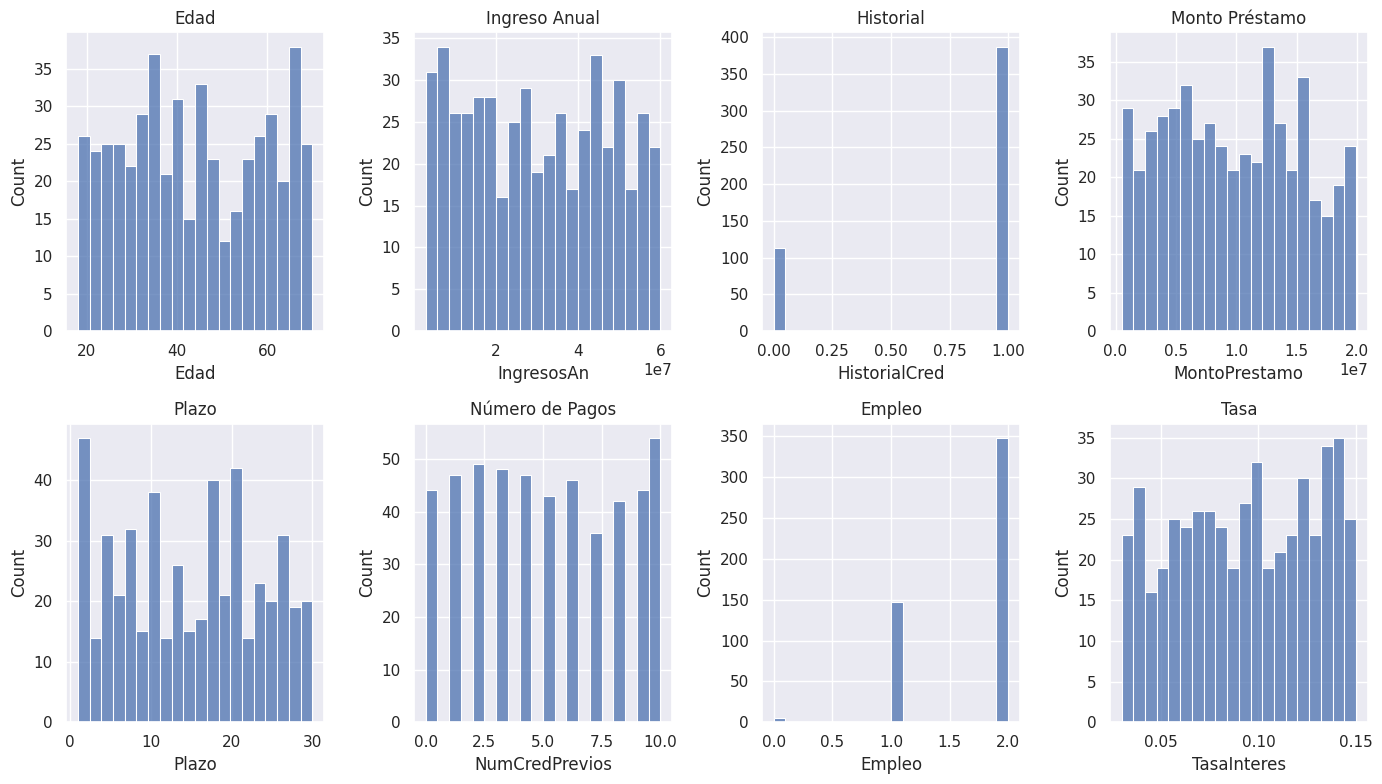

In [7]:
#Crear histogramas y graficos de dispersión
sns.set(rc={'figure.figsize':(14, 8)})
f, axes = plt.subplots(nrows=2, ncols=4)

Edad, IngresosAn, HistorialCred, MontoPrestamo, Plazo, NumeroCredPrevios, Empleo, TasaInteres = axes.flatten()
sns.histplot(datos['Edad'], ax=Edad, bins=20).set_title('Edad')
sns.histplot(datos['IngresosAn'], ax=IngresosAn, bins=20).set_title('Ingreso Anual')
sns.histplot(datos['HistorialCred'], ax=HistorialCred, bins=20).set_title('Historial')
sns.histplot(datos['MontoPrestamo'], ax=MontoPrestamo, bins=20).set_title('Monto Préstamo')
sns.histplot(datos['Plazo'], ax=Plazo, bins=20).set_title('Plazo')
sns.histplot(datos['NumCredPrevios'], ax=NumeroCredPrevios, bins=20).set_title('Número de Pagos')
sns.histplot(datos['Empleo'], ax=Empleo, bins=20).set_title('Empleo')
sns.histplot(datos['TasaInteres'], ax=TasaInteres, bins=20).set_title('Tasa')

plt.tight_layout()
plt.show()

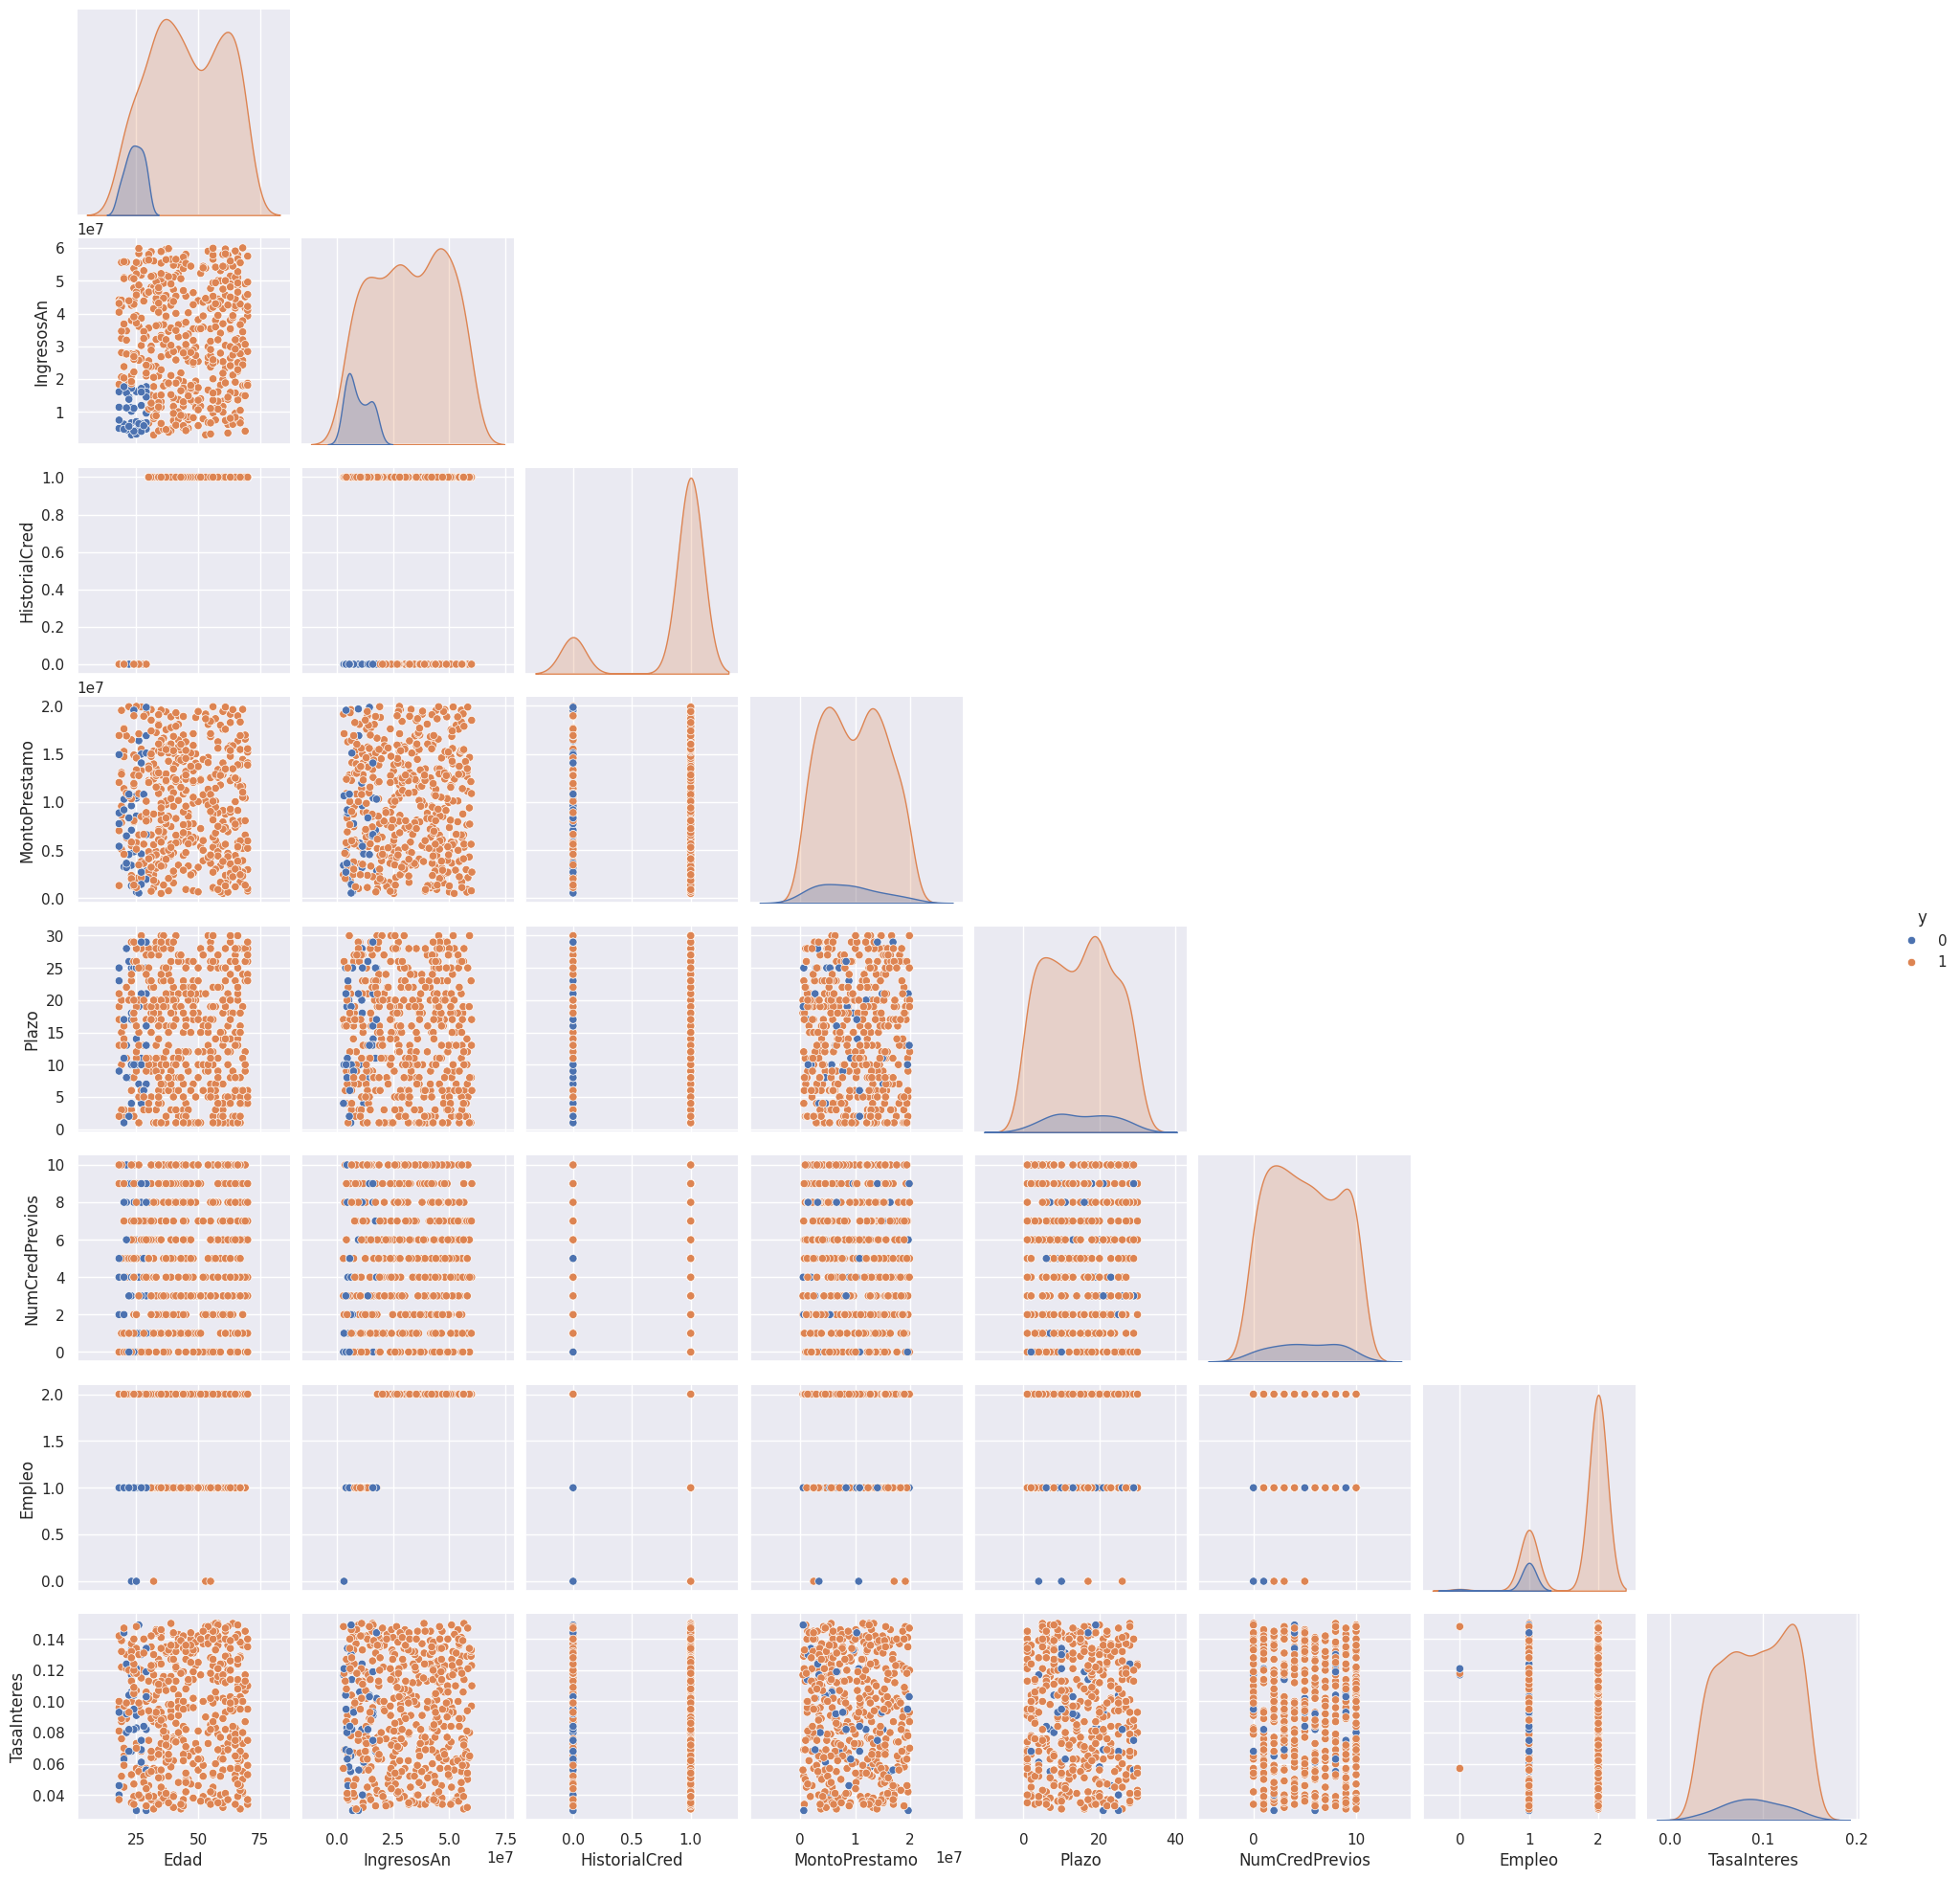

In [10]:
#gráficos de dispersión
sns.pairplot(data=datos.drop('ID',axis=1), hue='y', corner=True)
plt.show()

In [11]:
x = datos[['Edad','IngresosAn','HistorialCred','MontoPrestamo','Plazo','NumCredPrevios','Empleo','TasaInteres']]
y = datos['y']

In [12]:
# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
# Crear y entrenar el árbol de decisión
arbol = DecisionTreeClassifier()
arbol.fit(x_train, y_train)



DecisionTreeClassifier()

In [14]:
# Realizar predicciones en el conjunto de prueba
y_pred = arbol.predict(x_test)



In [15]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")



Precisión del árbol de decisión: 1.00


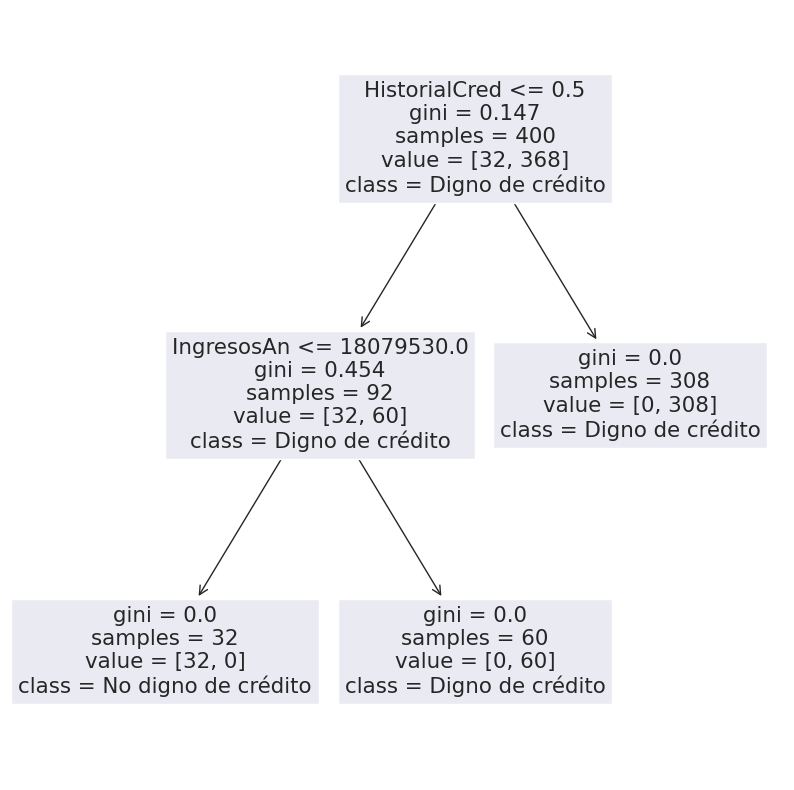

In [18]:
# Visualizar el árbol
plt.figure(figsize=(10, 10))
feature_names = ['Edad','IngresosAn','HistorialCred','MontoPrestamo','Plazo','NumCredPrevios','Empleo','TasaInteres']  #Agregar variables independientes
class_names = ['No digno de crédito','Digno de crédito'] #Agregar variables dependientes (Se le entrega el credito o no se le entrega)

plot_tree(arbol, feature_names=feature_names, class_names=class_names)
plt.show()

#La flecha a la derecha es que si se cumple y los de la izquierda es que no
#C